# QAPT 
# Problem: Inverted Pendulum

## A massless rod with a mass at one end has its other end oscillating vertically at a given frequency and amplitude. Under some conditions, the mass will remain above the horizontal instead of falling over like a normal pendulum. Investigate how the stability of the upright position depends on relevant parameters

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import csv
import pandas as pd

## Solving ODE and checking fits

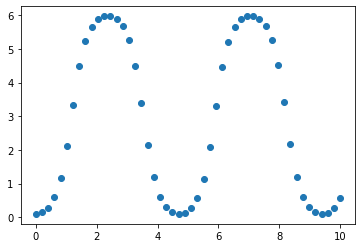

In [3]:
g = 9.81
l = 1
A = 0.04
w = 140

theta_o = 0.1

def dthdt(th, t):
    th, thp = th
    dthdt = thp
    dthpdt = (2 * np.cos(th) + w * A * np.sin(w * t) * thp + 2 * g * l * np.sin(th)) / (2 * l)
    return [dthdt, dthpdt]

t = np.linspace(0, 10, 50)
sol = odeint(dthdt, [theta_o, 0], t)

th = sol[:, 0]

plt.scatter(t, th)

In [4]:
g = 9.81
l = 1
A = 0.04
w = 140

theta_o = 0.1

def dthdt(th, t):
    th, thp = th
    dthdt = thp
    #dthpdt = (2 * l * np.cos(th) + w * A * np.sin(w * t) * thp + 2 * g * l * np.sin(th) - 2*l*A*w*(np.cos(th)*np.cos(w*t) - thp*np.sin(w*t)*np.sin(th))) / (2 * l**2)
    dthpdt = (2*thp*l*A*w*np.sin(w*t)*np.cos(th) + 2*g*l*np.sin(th) - 2*A*w*l*(thp*np.cos(th)*np.sin(w*t) + w*np.sin(th)*np.cos(w*t)))/(2*l**2)
    return [dthdt, dthpdt]

t = np.linspace(0, 10, 1000)
sol = odeint(dthdt, [theta_o, 0], t)

th = sol[:, 0]

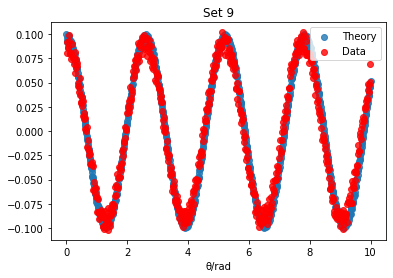

In [5]:
data = pd.read_csv("inverted-pendulum/rod 1/set9/data1.csv", header=None)
l1 = plt.scatter(t, th, alpha=0.8)
l2 = plt.scatter(data[0], data[1], color="red", alpha=0.8)
plt.title("Set 9")
plt.xlabel("t/s")
plt.xlabel("θ/rad")
plt.gca().legend(["Theory","Data"])
plt.plot()
plt.savefig("set9.png", transparent=True)

In [6]:
g = 9.81
l = 1
A = 0.04
w = 140

theta_o = 0.1

t = np.linspace(0, 30, 1000)
sol1 = odeint(dthdt, [theta_o, 0], t)
w=80
sol2 = odeint(dthdt, [theta_o, 0], t)

Text(0.5, 1.0, 'θ vs t')

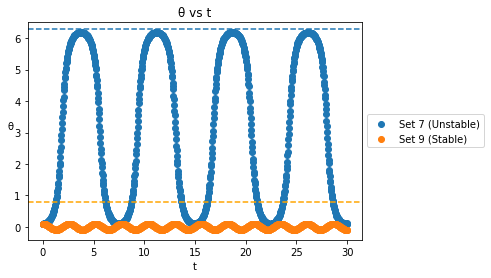

In [7]:
plt.scatter(t, sol2[:,0])
plt.scatter(t, sol1[:,0])
plt.ylabel("θ", rotation=0)
plt.xlabel("t")
plt.legend(["Set 7 (Unstable)", "Set 9 (Stable)"], bbox_to_anchor=(1, 0.6))
plt.axhline(np.pi/4, linestyle='--', color="orange")
plt.axhline(2*np.pi, linestyle='--')
#plt.text(32, np.pi/4, "π/4", color="orange", fontsize=15)
plt.title("θ vs t")

## Visualizing data via x,y position of mass

In [8]:
from matplotlib.animation import FuncAnimation

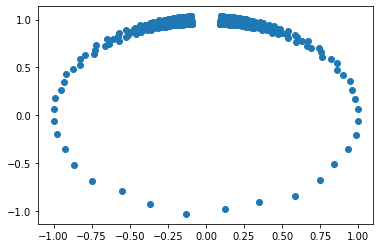

In [9]:
g = 9.81
l = 1
A = 0.04
w = 100
w = 110.89836734693877

theta_o = 0.1

t = np.linspace(0, 20, 500)
sol = odeint(dthdt, [theta_o, 0], t)
th = sol[:, 0]


xp = 0
yp = A * np.cos(w * t)

x = l * np.sin(th) + xp
y = l * np.cos(th) + yp
plt.scatter(x, y)

In [10]:
from IPython.display import HTML

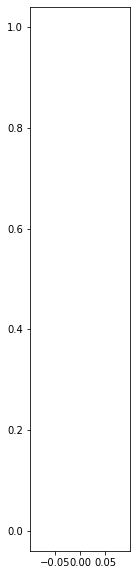

In [11]:
g = 9.81
l = 1
A = 0.04
#w = 100
w = 140

theta_o = 0.1

t = np.linspace(0, 20, 500)
sol = odeint(dthdt, [theta_o, 0], t)
th = sol[:, 0]


xp = 0
yp = A * np.cos(w * t)

x = l * np.sin(th) + xp
y = l * np.cos(th) + yp

fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(min([min(x),0]), max([max(x),0])), ylim=(min([min(y),min(yp)]), max([max(y),max(yp)])))
ax.set_aspect('equal', adjustable='box')
line, = ax.plot([], [], "ro")
line2, = ax.plot([], [], color="red")
line3, = ax.plot([], [], "ro")

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line, line2, line3,

# animation function.  This is called sequentially
def animate(i):
    line.set_data([x[i]], [y[i]])
    line2.set_data([x[i], xp], [y[i], yp[i]])
    line3.set_data([xp], [yp[i]])
    return line, line2, line3,

# call the animator.  blit=True means only re-draw the parts that have changed.


# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30)
plt.show()


In [12]:
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=15, blit=True)

In [13]:
HTML(anim.to_html5_video())

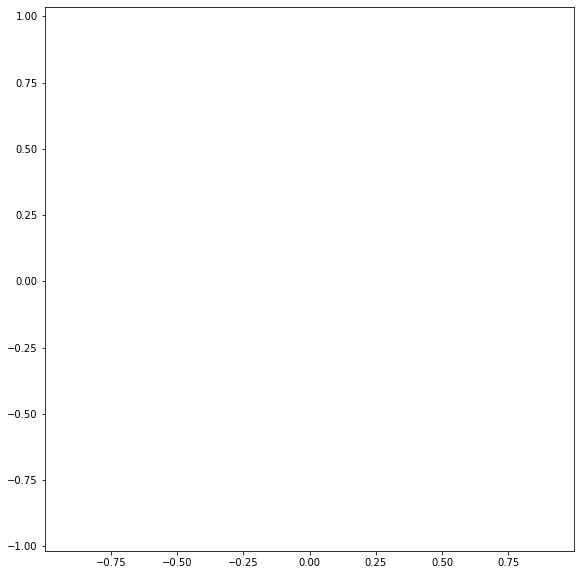

In [14]:
g = 9.81
l = 1
A = 0.04
w = 100

theta_o = 0.1

t = np.linspace(0, 20, 500)
sol = odeint(dthdt, [theta_o, 0], t)
th = sol[:, 0]


xp = 0
yp = A * np.cos(w * t)

x = l * np.sin(th) + xp
y = l * np.cos(th) + yp

fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(min([min(x),0]), max([max(x),0])), ylim=(min([min(y),min(yp)]), max([max(y),max(yp)])))
ax.set_aspect('equal', adjustable='box')
line, = ax.plot([], [], "ro")
line2, = ax.plot([], [], color="red")
line3, = ax.plot([], [], "ro")

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line, line2, line3,

# animation function.  This is called sequentially
def animate(i):
    line.set_data([x[i]], [y[i]])
    line2.set_data([x[i], xp], [y[i], yp[i]])
    line3.set_data([xp], [yp[i]])
    return line, line2, line3,

# call the animator.  blit=True means only re-draw the parts that have changed.


# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30)
plt.show()


In [15]:
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=15, blit=True)
HTML(anim.to_html5_video())

## Data exploration involving conditions for upright stability/instability

In [42]:
from tqdm.notebook import tqdm

In [57]:
g = 9.81
l = 1
A = 0.04
#w = 100
t = np.linspace(0, 10, 50)
maxth=[]
for w in tqdm(range(1, 200)):
    maxth.append([w,abs(max(odeint(dthdt, [0.1, 0], t)[:, 0], key = lambda th:abs(th)))])

  0%|          | 0/199 [00:00<?, ?it/s]

Text(0, 0.5, 'theta_Max')

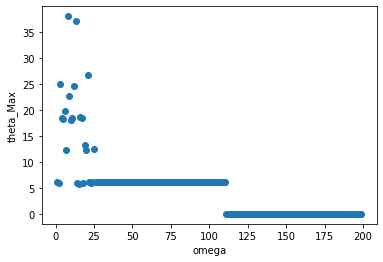

In [58]:
plt.scatter([i[0] for i in maxth], [i[1] for i in maxth])
plt.xlabel("omega")
plt.ylabel("theta_Max")

  0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 1.0, 'A=0.04')

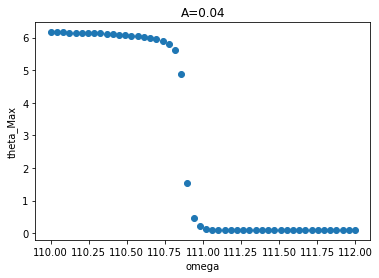

In [60]:
g = 9.81
l = 1
A = 0.04
#w = 100
t = np.linspace(0, 10, 50)
maxth=[]
for w in tqdm(np.linspace(110, 112, 50)):
    maxth.append([w,abs(max(odeint(dthdt, [0.1, 0], t)[:, 0], key = lambda th:abs(th)))])

plt.scatter([i[0] for i in maxth], [i[1] for i in maxth])
plt.xlabel("omega")
plt.ylabel("theta_Max")
plt.title("A=0.04")

  0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 1.0, 'A=0.04')

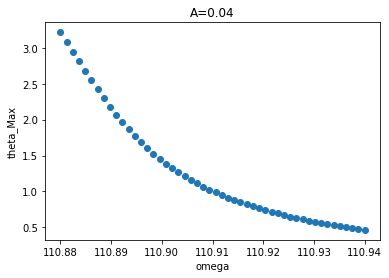

In [252]:
g = 9.81
l = 1
A = 0.04
#w = 100
t = np.linspace(0, 10, 50)
maxth=[]
for w in tqdm(np.linspace(110.88, 110.94, 50)):
    maxth.append([w,abs(max(odeint(dthdt, [0.1, 0], t)[:, 0], key = lambda th:abs(th)))])

plt.scatter([i[0] for i in maxth], [i[1] for i in maxth])
plt.xlabel("omega")
plt.ylabel("theta_Max")
plt.title("A=0.04")

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'A=0.01')

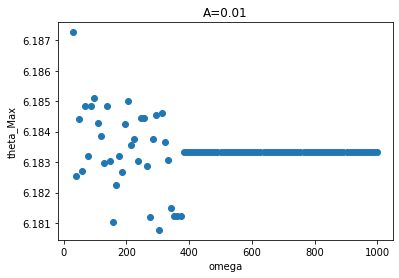

In [68]:
g = 9.81
l = 1
A = 0.01
#w = 100
t = np.linspace(0, 10, 50)
maxth=[]
for w in tqdm(np.linspace(30, 1000, 100)):
    maxth.append([w,abs(max(odeint(dthdt, [0.1, 0], t)[:, 0], key = lambda th:abs(th)))])

plt.scatter([i[0] for i in maxth], [i[1] for i in maxth])
plt.xlabel("omega")
plt.ylabel("theta_Max")
plt.title("A=0.01")

  0%|          | 0/100 [00:00<?, ?it/s]

[]

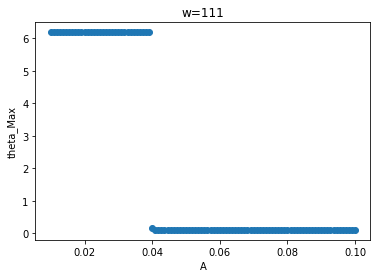

In [101]:
g = 9.81
l = 1
A = 0.01
w = 111
t = np.linspace(0, 10, 50)
maxth=[]
for A in tqdm(np.linspace(0.01, 0.1, 100)):
    maxth.append([A,abs(max(odeint(dthdt, [0.1, 0], t)[:, 0], key = lambda th:abs(th)))])

plt.scatter([i[0] for i in maxth], [i[1] for i in maxth])
plt.xlabel("A")
plt.ylabel("theta_Max")
plt.title("w=111")
plt.plot()

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'w=100')

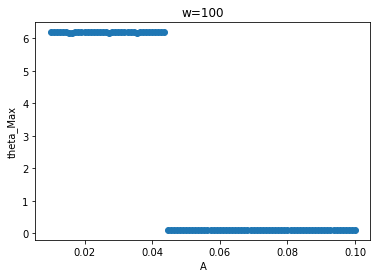

In [73]:
g = 9.81
l = 1
A = 0.01
w = 100
t = np.linspace(0, 10, 50)
maxth=[]
for A in tqdm(np.linspace(0.01, 0.1, 100)):
    maxth.append([A,abs(max(odeint(dthdt, [0.1, 0], t)[:, 0], key = lambda th:abs(th)))])

plt.scatter([i[0] for i in maxth], [i[1] for i in maxth])
plt.xlabel("A")
plt.ylabel("theta_Max")
plt.title("w=100")

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'w=111')

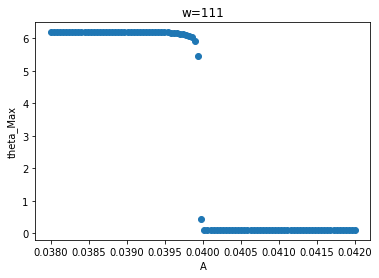

In [74]:
g = 9.81
l = 1
A = 0.01
w = 111
t = np.linspace(0, 10, 50)
maxth=[]
for A in tqdm(np.linspace(0.038, 0.042, 100)):
    maxth.append([A,abs(max(odeint(dthdt, [0.1, 0], t)[:, 0], key = lambda th:abs(th)))])

plt.scatter([i[0] for i in maxth], [i[1] for i in maxth])
plt.xlabel("A")
plt.ylabel("theta_Max")
plt.title("w=111")

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'w=100')

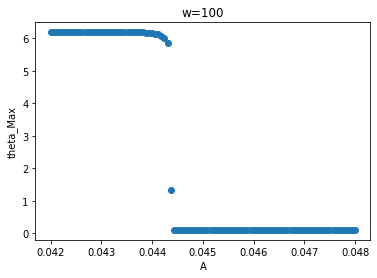

In [75]:
g = 9.81
l = 1
A = 0.01
w = 100
t = np.linspace(0, 10, 50)
maxth=[]
for A in tqdm(np.linspace(0.042, 0.048, 100)):
    maxth.append([A,abs(max(odeint(dthdt, [0.1, 0], t)[:, 0], key = lambda th:abs(th)))])

plt.scatter([i[0] for i in maxth], [i[1] for i in maxth])
plt.xlabel("A")
plt.ylabel("theta_Max")
plt.title("w=100")

### confirming theory that boundary for stability is at around A*omega = 4.43

In [149]:
g = 9.81
l = 1
Aw = 4.43
#w = 100
t = np.linspace(0, 10, 50)
maxth1, maxth2=[],[]
for w in tqdm(range(50,200)):
    A = Aw/w
    maxth1.append([w,abs(max(odeint(dthdt, [0.1, 0], t)[:, 0], key = lambda th:abs(th)))])
Aw = 4.44
for w in tqdm(range(50,200)):
    A = Aw/w
    maxth2.append([w,abs(max(odeint(dthdt, [0.1, 0], t)[:, 0], key = lambda th:abs(th)))])

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

Text(0.5, 1.0, 'θ_max against ω')

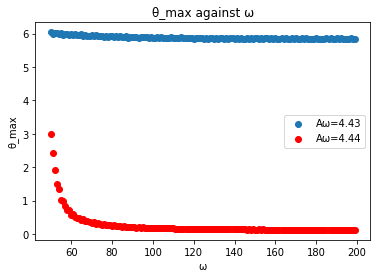

In [150]:

plt.scatter([i[0] for i in maxth1], [i[1] for i in maxth1])
plt.scatter([i[0] for i in maxth2], [i[1] for i in maxth2], color="red")
plt.xlabel("ω")
plt.ylabel("θ_max")
plt.legend(["Aω=4.43", "Aω=4.44"])
plt.title("θ_max against ω")

  0%|          | 0/150 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Aw=4.43')

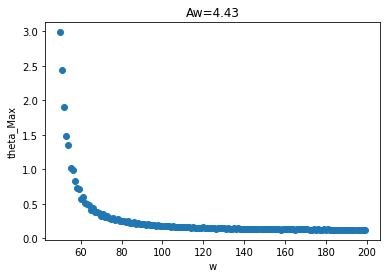

In [78]:
g = 9.81
l = 1
Aw = 4.44
#w = 100
t = np.linspace(0, 10, 50)
maxth=[]
for w in tqdm(range(50,200)):
    A = Aw/w
    maxth.append([w,abs(max(odeint(dthdt, [0.1, 0], t)[:, 0], key = lambda th:abs(th)))])

plt.scatter([i[0] for i in maxth], [i[1] for i in maxth])
plt.xlabel("w")
plt.ylabel("theta_Max")
plt.title("Aw=4.43")

### Phase plot of how theta_max is affected by A and omega

0it [00:00, ?it/s]

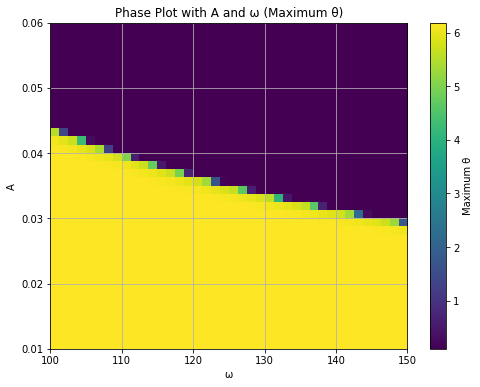

In [145]:
g = 9.81
l = 1
theta_o = 0.1

def dthdt(th, t):
    th, thp = th
    dthdt = thp
    dthpdt = (2 * thp * l * A * w * np.sin(w * t) * np.cos(th) + 
                2 * g * l * np.sin(th) - 
                2 * A * w * l * (thp * np.cos(th) * np.sin(w * t) + w * np.sin(th) * np.cos(w * t))) / (2 * l**2)
    return [dthdt, dthpdt]
    
t = np.linspace(0, 5, 20)

def ode(A, w):

    sol = odeint(dthdt, [theta_o, 0], t)

    return np.max(sol[:, 0])


A_values = np.linspace(0.01, 0.06, 40)
w_values = np.linspace(100, 150, 40)

max_theta_values = np.zeros((len(A_values), len(w_values)))

for i, A in tqdm(enumerate(A_values)):
    for j, w in enumerate(w_values):
        max_theta_values[i, j] = ode(A, w)

plt.figure(figsize=(8, 6))
plt.imshow(max_theta_values, extent=[np.min(w_values), np.max(w_values), np.min(A_values), np.max(A_values)], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Maximum θ')
plt.xlabel('ω')
plt.ylabel('A')
plt.title('Phase Plot with A and ω (Maximum θ)')
plt.grid()
plt.show()
